# Speed Dating - Part I

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment.

In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
from plotly.subplots import make_subplots 
import plotly.offline as py
pio.renderers.default = "notebook_connected"


# Exploring the data

In [3]:
path_to_file="/Users/saas1/OneDrive/Escritorio/introduction_to_ python_for_data_science/Projects/Project_2"
raw_data=pd.read_excel(path_to_file +"/Speed Dating Data.xlsx")

In [40]:
raw_data.describe()

iid           id       gender          idg       condtn  \
count  8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
mean    283.675937     8.960248     0.500597    17.327166     1.828837   
std     158.583367     5.491329     0.500029    10.940735     0.376673   
min       1.000000     1.000000     0.000000     1.000000     1.000000   
25%     154.000000     4.000000     0.000000     8.000000     2.000000   
50%     281.000000     8.000000     1.000000    16.000000     2.000000   
75%     407.000000    13.000000     1.000000    26.000000     2.000000   
max     552.000000    22.000000     1.000000    44.000000     2.000000   

              wave        round     position     positin1        order  ...  \
count  8378.000000  8378.000000  8378.000000  6532.000000  8378.000000  ...   
mean     11.350919    16.872046     9.042731     9.295775     8.927668  ...   
std       5.995903     4.358458     5.514939     5.650199     5.477009  ...   
min       1.000000     5.000000     1.000000     1.000000     1.000000  ...   
25%       7.000000    14.000000     4.000000     4.000000     4.000000  ...   
50%      11.000000    18.000000     8.000000     9.000000     8.000000  ...   
75%      15.000000    20.000000    13.000000    14.000000    13.000000  ...   
max      21.000000    22.000000    22.000000    22.000000    22.000000  ...   

           attr3_3      sinc3_3    intel3_3       fun3_3       amb3_3  \
count  3959.000000  3959.000000  3959.00000  3959.000000  3959.000000   
mean      7.233645     8.089922     8.39025     7.661278     7.385451   
std       1.575847     1.612388     1.46166     1.747500     1.962625   
min       2.000000     2.000000     3.00000     2.000000     1.000000   
25%       7.000000     7.000000     8.00000     7.000000     6.000000   
50%       7.000000     8.000000     8.00000     8.000000     8.000000   
75%       8.000000     9.000000     9.00000     9.000000     9.000000   
max      12.000000    12.000000    12.00000    12.000000    12.000000   

           attr5_3      sinc5_3     intel5_3       fun5_3       amb5_3  
count  2001.000000  2001.000000  2001.000000  2001.000000  2001.000000  
mean      6.808596     7.612194     7.932034     7.156422     7.041479  
std       1.512893     1.509812     1.345875     1.678994     1.722434  
min       2.000000     2.000000     4.000000     1.000000     1.000000  
25%       6.000000     7.000000     7.000000     6.000000     6.000000  
50%       7.000000     8.000000     8.000000     7.000000     7.000000  
75%       8.000000     9.000000     9.000000     8.000000     8.000000  
max      10.000000    10.000000    10.000000    10.000000    10.000000  

[8 rows x 187 columns]

In [41]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(12), object(8)
memory usage: 12.5+ MB


In [42]:
raw_data.shape

(8378, 195)

In [43]:
print(raw_data.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [46]:
print(pd.isnull(raw_data).sum())

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6377
sinc5_3     6377
intel5_3    6377
fun5_3      6377
amb5_3      6377
Length: 195, dtype: int64


In [30]:
raw_data.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [22]:
a=len(raw_data)
print('The total number of dates is {}'.format(a))

b=len(raw_data['iid'].unique())
print('The total number of participants is {}'.format(b))

c=raw_data['age'].mean()
print('The average age of the participants is {}'.format(c))

The total number of dates is 8378
The total number of participants is 551
The average age of the participants is 26.358927924664975


# Preparing the data

In [101]:
df_clean=raw_data.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(12), object(8)
memory usage: 12.5+ MB


gender
0    26.126394
1    26.587591
dtype: float64

In [102]:
df_clean["gender"]=df_clean["gender"].apply(lambda x: "Female" if x==0 else "Male")
df_clean.pivot_table(index='iid',columns='gender',values='age').mean()

gender
Female    26.126394
Male      26.587591
dtype: float64

In [103]:
race_replace={1:"Black/African American", 2: "European/Caucasion-American", 3: "Latino/Hispanic American",
                4: "Asian/Pacific Islander/Asian-American",5: "Native American",6: "Other"}
df_clean["race"].replace(race_replace, inplace=True)


gender
Female    26.126394
Male      26.587591
dtype: float64

In [154]:
field_replace={1:"Law",2:"Math", 3:"Social Science, Psychologist",4:"Medican Science, Pharmaceuticals, and Bio Tech", 5:"Engineering",
6:"English/Creative Writing / Journalism", 7:"History/ Religion/ Philosophy", 8:"Business/Econ/Finance", 9:"Education, Academia",
10:"Biological Sciences / Chemistry/ Physics", 11:"Social Work", 12:"Undergrad/undecided", 13:"Political Science/ International Affairs",
14:"Film", 15:"Fine Arts / Arts Administration",16:"Languages",17:"Architecture", 18:"Other"}

df_clean["field_cd"].replace(field_replace, inplace=True)

In [137]:
df_clean=df_clean.dropna(subset=['age', 'iid',"gender"])
df_clean.shape

(8283, 195)

In [116]:
df_clean.pivot_table(index='iid',columns='gender',values='age').mean()

gender
Female    26.126394
Male      26.587591
dtype: float64

In [115]:
df_clean.groupby(["race"])['match'].count()

race
Asian/Pacific Islander/Asian-American    1982
Black/African American                    420
European/Caucasion-American              4727
Latino/Hispanic American                  664
Other                                     522
Name: match, dtype: int64

In [114]:
df_clean.groupby("race")['match'].mean()

race
Asian/Pacific Islander/Asian-American    0.134712
Black/African American                   0.202381
European/Caucasion-American              0.166702
Latino/Hispanic American                 0.185241
Other                                    0.197318
Name: match, dtype: float64

# Speed Dating - Part II

Let's try to produce our first visualisations with Seaborn. Based on the exploration you realized, try to find relationships between variables. 

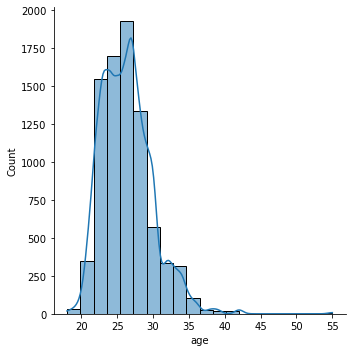

In [130]:
sns.displot(df_clean["age"],kde=True,bins=20);

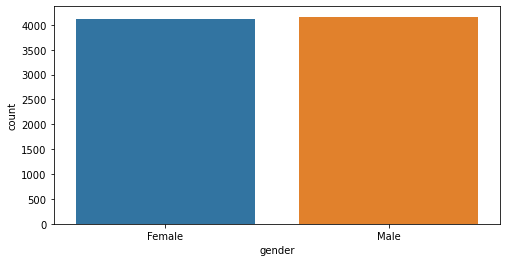

In [139]:
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=df_clean);

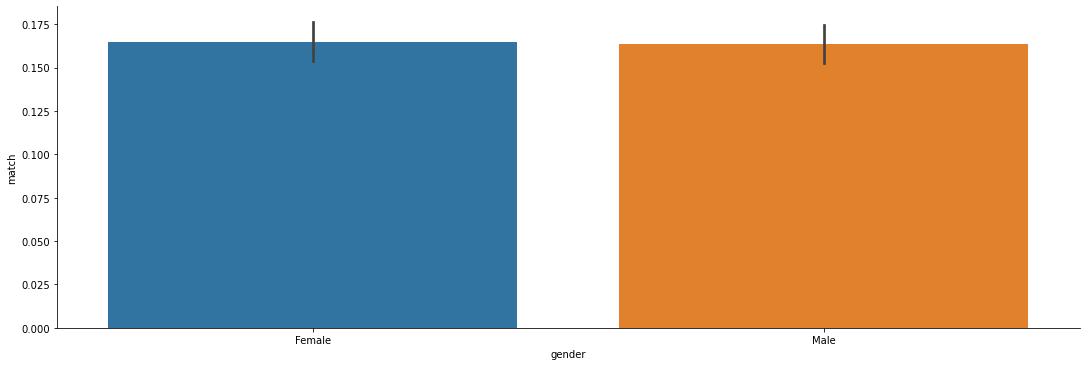

In [151]:
sns.catplot(x="gender", y="match", kind="bar", data=df_clean,aspect=3,height=5);

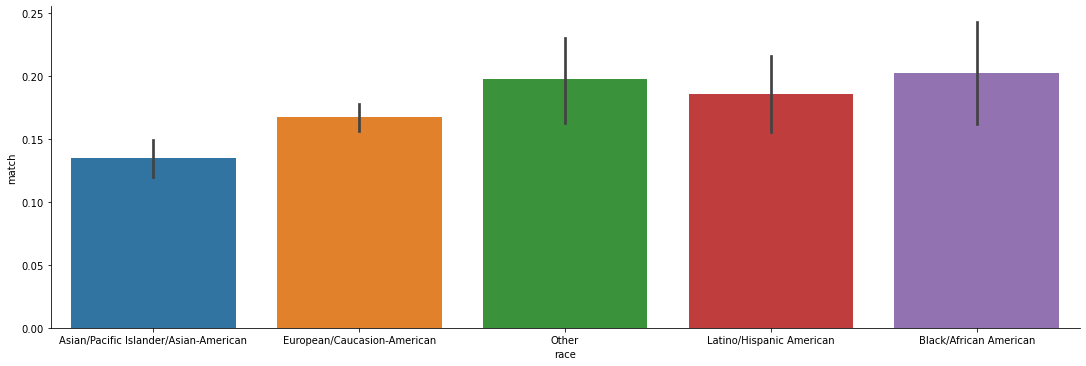

In [152]:
sns.catplot(x="race", y="match", kind="bar", data=df_clean,aspect=3,height=5);

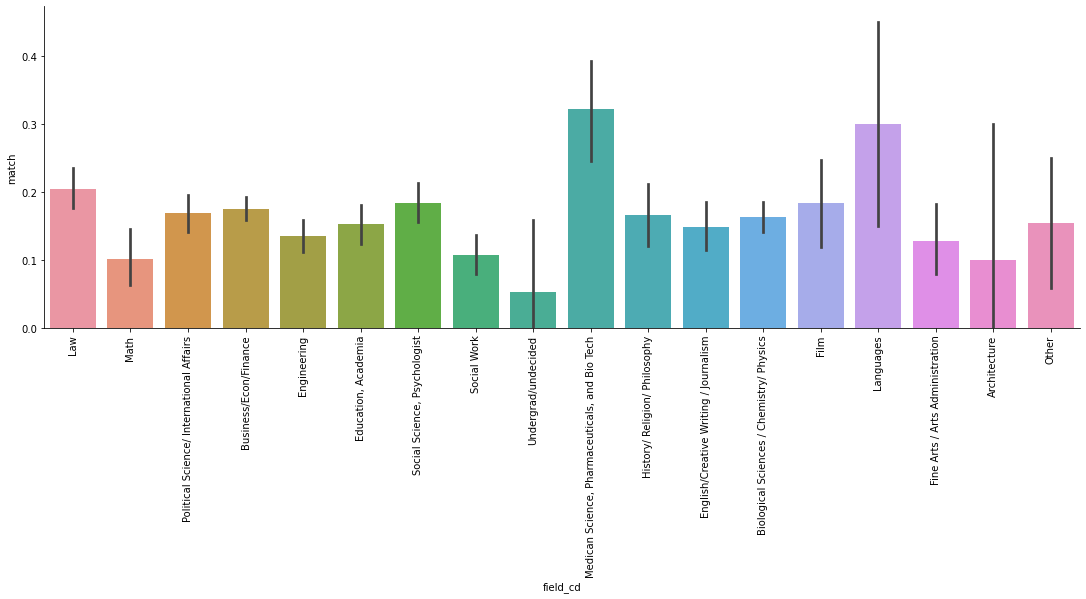

In [186]:
g=sns.catplot(x="field_cd", y="match", kind="bar", data=df_clean,aspect=3,height=5);
g.set_xticklabels(rotation=90);


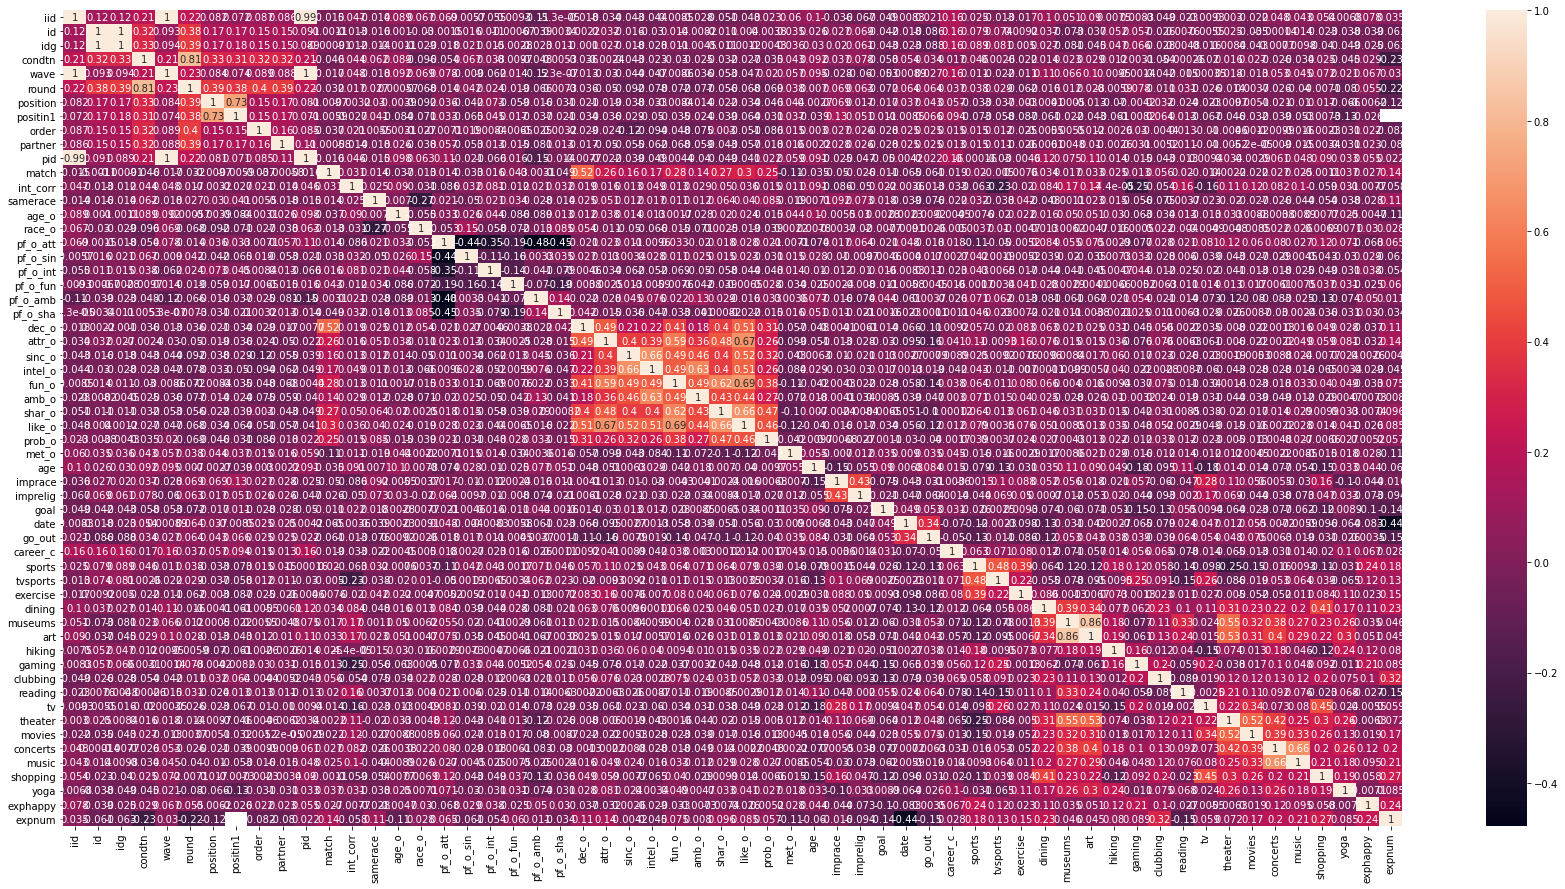

In [161]:
general_information= df_clean[df_clean.columns[:69]]
corr=general_information.corr()

f, ax = plt.subplots(figsize=(30, 15)) # create a "sheet" to have bigger graph
sns.heatmap(corr, annot=True, ax=ax);

In [163]:
corre=df_clean.corr()
corre["match"]=abs(corre["match"])
s=corre["match"]
s.sort_values(ascending=False)

match      1.000000
dec_o      0.522842
dec        0.520148
like       0.304814
like_o     0.304605
             ...   
id         0.001127
idg        0.000906
amb3_2     0.000905
partner    0.000577
amb2_1     0.000112
Name: match, Length: 184, dtype: float64

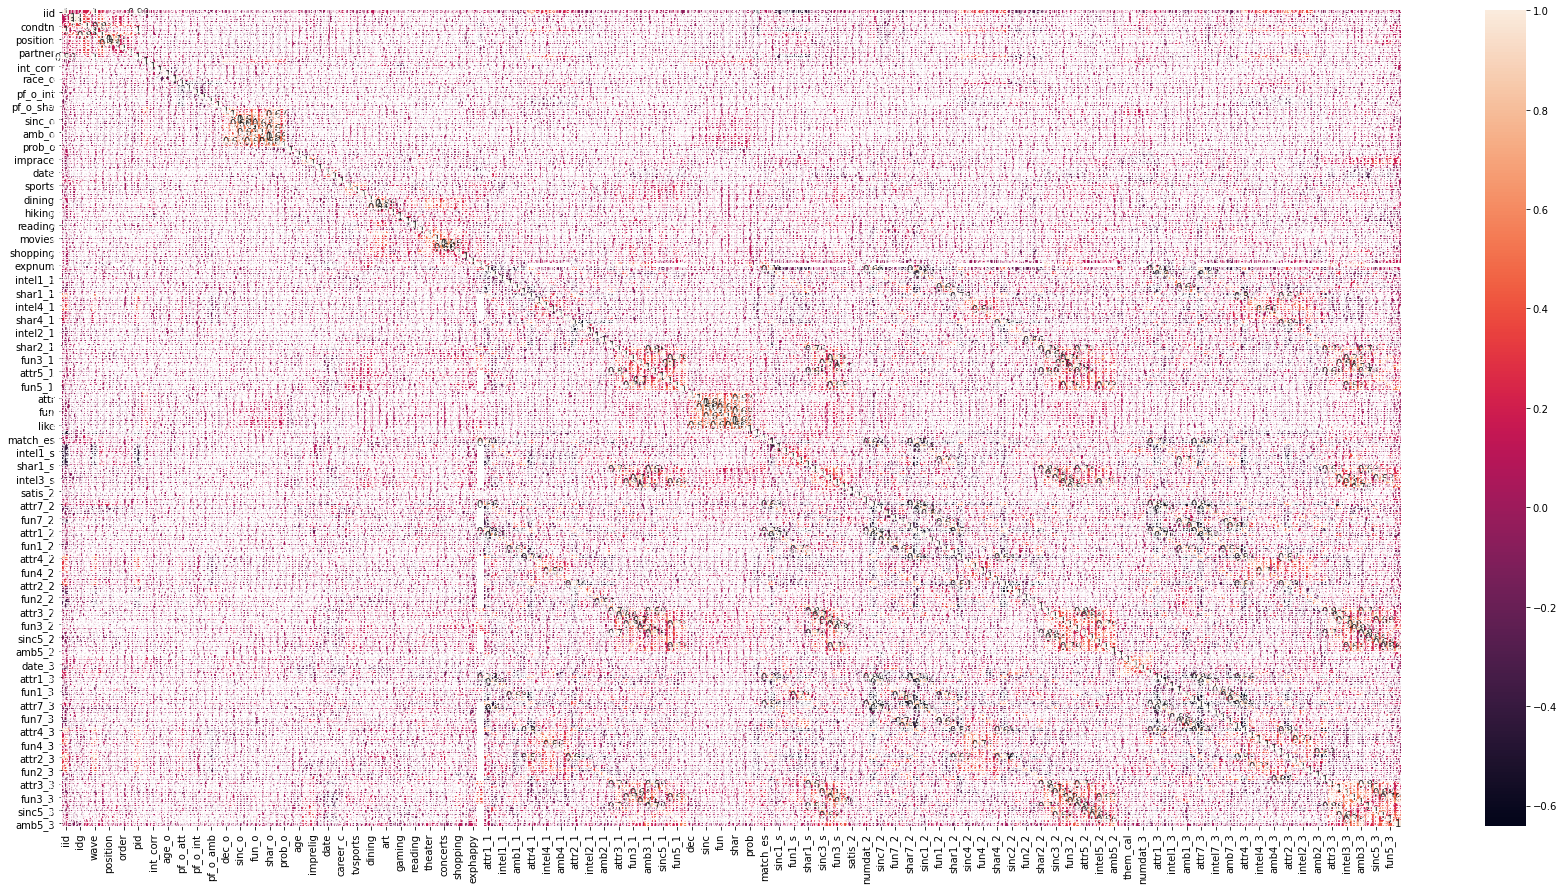

In [164]:
f, ax = plt.subplots(figsize=(30, 15)) # create a "sheet" to have bigger graph
sns.heatmap(corre, annot=True, ax=ax);

In [136]:
#general_information= df_clean[df_clean.columns[:69]]
#general_information.columns.to_list
#general information columns 0 to 68(included)
#df_final=pd.melt(df_clean, id_vars=df_clean.columns[:69], value_vars=df_clean.columns[69:], 
                #var_name="survey", value_name="responses")

In [167]:
fig=px.histogram(df_clean,"race")
fig.show()

In [180]:
fig=px.histogram(df_clean,x='imprace',color='race',title="Importance of race");
fig.show()

In [179]:
fig=px.histogram(df_clean,x='imprelig',color='race',title="Importance of the religion by race");
fig.show()

In [191]:
fig=px.histogram(df_clean,x='career',color='gender',title="Career by gender");
fig.show()

In [193]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = df_clean.groupby(['gender']).mean()[activities_interested].values


array([[5.83121331, 4.18370841, 6.47822896, 8.15215264, 7.4214775 ,
        7.20181018, 5.92343444, 3.32485323, 5.88282779, 7.90092955,
        5.73336595, 7.47749511, 8.19080235, 7.09735812, 7.97504892,
        6.5053816 , 4.98605675],
       [7.03012048, 4.97927711, 6.03759036, 7.41903614, 6.54963855,
        6.21228916, 5.51783133, 4.45060241, 5.60168675, 7.45036145,
        4.86216867, 6.07710843, 7.64144578, 6.55012048, 7.7173494 ,
        4.76795181, 3.67951807]])

In [202]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,],
    name='Women',
    marker=dict(
        color='yellow'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,],
    name='Men',
    marker=dict(
        color='blue'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Interest Men vs Women',
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')